# 1083 Albumin Initial ML

### By: Ian Weimer

## Imports

In [76]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import warnings
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import balanced_accuracy_score
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [187]:
df = pd.read_csv('albumin_cleaned_3.csv')

In [188]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [189]:
df.head()

age  sex  zip_code  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1         1       5.0    1  1016.016667                 0   
1  42.0    1         0       5.0    0   698.150000                 0   
2  73.0    1         2       4.0    0   135.266667                 0   
3  73.0    1         6       4.0    0    58.183333                 0   
4  70.0    0         8       5.0    0   333.866667                 0   

   total_transfusions  anemia_status  CCI  30_day_mortality  \
0                   1            2.0    6                 0   
1                   0            0.0    3                 0   
2                   0            3.0    2                 0   
3                   2            1.0    2                 0   
4                   0            0.0    2                 0   

   30_day_readmission  albumin_value  hemoglobin  albumin_24hrs  MELD  qSOFA  \
0                   0            2.9         8.4            0.0  11.0      1   
1                   0            3.8        16.1            0.0  13.0      2   
2                   0            1.5         5.6            0.0   9.0      0   
3                   0            2.5        10.3            1.0   9.0      0   
4                   0            3.9        14.0            1.0  10.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0          1             1            0    34      45        1  
1          0             1            0    54      73        1  
2          1             0            0    43     111        1  
3          1             0            0    18     120        1  
4          1             1            0    41      63        1

In [190]:
df.shape

(46629, 23)

In [191]:
df = df.drop(columns=['30_day_readmission', '30_day_mortality'])

In [192]:
df['albumin_value'].describe()

count    46629.000000
mean         3.166509
std          0.659375
min          1.160000
25%          2.700000
50%          3.200000
75%          3.600000
max          5.100000
Name: albumin_value, dtype: float64

In [193]:
df.describe()

age           sex      zip_code      bed_size           ICU  \
count  46629.000000  46629.000000  46629.000000  46629.000000  46629.000000   
mean      67.988312      0.545455      4.722812      4.509125      0.195458   
std       14.622518      0.497935      3.371110      0.900318      0.396557   
min       21.000000      0.000000      0.000000      0.000000      0.000000   
25%       59.000000      0.000000      1.000000      4.000000      0.000000   
50%       70.000000      1.000000      5.000000      5.000000      0.000000   
75%       80.000000      1.000000      8.000000      5.000000      0.000000   
max       89.000000      1.000000      9.000000      5.000000      1.000000   

          LOS_hours  mass_transfusion  total_transfusions  anemia_status  \
count  46629.000000      46629.000000        46629.000000   46629.000000   
mean     158.817633          0.023419            0.655708       1.742199   
std      162.472085          0.151231            1.095456       1.083163   
min        0.000000          0.000000            0.000000       0.000000   
25%       66.850000          0.000000            0.000000       1.000000   
50%      100.700000          0.000000            0.000000       2.000000   
75%      181.116667          0.000000            1.000000       3.000000   
max     1155.033333          1.000000            6.000000       3.000000   

                CCI  albumin_value    hemoglobin  albumin_24hrs          MELD  \
count  46629.000000   46629.000000  46629.000000   46629.000000  46629.000000   
mean       3.359412       3.166509      8.785832       0.042506     11.752025   
std        2.633050       0.659375      2.675857       0.201742      6.436456   
min        0.000000       1.160000      1.600000       0.000000      6.000000   
25%        1.000000       2.700000      6.800000       0.000000      7.000000   
50%        3.000000       3.200000      8.500000       0.000000      9.000000   
75%        5.000000       3.600000     10.600000       0.000000     14.000000   
max       19.000000       5.100000     17.000000       1.000000     40.000000   

              qSOFA     Cirrhosis  beta_blocker   hemorrhagic          SAPS  \
count  46629.000000  46629.000000  46629.000000  46629.000000  46629.000000   
mean       0.416329      0.933132      0.311373      0.054816     25.137768   
std        0.642641      0.249796      0.463060      0.227623     10.226741   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      0.000000      0.000000     18.000000   
50%        0.000000      1.000000      0.000000      0.000000     24.000000   
75%        1.000000      1.000000      1.000000      0.000000     31.000000   
max        3.000000      1.000000      1.000000      1.000000     60.000000   

             tenant       albumin  
count  46629.000000  46629.000000  
mean      60.925926      0.122027  
std       23.521380      0.327321  
min        1.000000      0.000000  
25%       45.000000      0.000000  
50%       63.000000      0.000000  
75%       68.000000      0.000000  
max      120.000000      1.000000

## Convert LOS to Categorical

In [194]:
df['LOS_hours'].describe()

count    46629.000000
mean       158.817633
std        162.472085
min          0.000000
25%         66.850000
50%        100.700000
75%        181.116667
max       1155.033333
Name: LOS_hours, dtype: float64

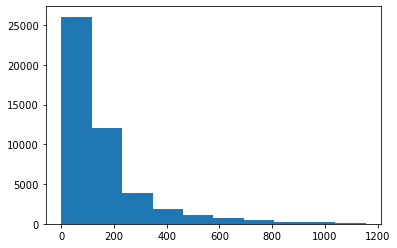

In [195]:
plt.hist(df['LOS_hours']);

In [196]:
LOS = df['LOS_hours']
m = max(LOS)

bins = [0, 100, 200, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

LOS = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [197]:
df['LOS_hours'] = LOS

In [198]:
df['LOS_hours'].head()

0    2
1    2
2    1
3    0
4    2
Name: LOS_hours, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [199]:
df['LOS_hours'].value_counts()

0    23081
1    13411
2    10137
Name: LOS_hours, dtype: int64

In [200]:
df.head()

age  sex  zip_code  bed_size  ICU LOS_hours  mass_transfusion  \
0  45.0    1         1       5.0    1         2                 0   
1  42.0    1         0       5.0    0         2                 0   
2  73.0    1         2       4.0    0         1                 0   
3  73.0    1         6       4.0    0         0                 0   
4  70.0    0         8       5.0    0         2                 0   

   total_transfusions  anemia_status  CCI  albumin_value  hemoglobin  \
0                   1            2.0    6            2.9         8.4   
1                   0            0.0    3            3.8        16.1   
2                   0            3.0    2            1.5         5.6   
3                   2            1.0    2            2.5        10.3   
4                   0            0.0    2            3.9        14.0   

   albumin_24hrs  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0            0.0  11.0      1          1             1            0    34   
1            0.0  13.0      2          0             1            0    54   
2            0.0   9.0      0          1             0            0    43   
3            1.0   9.0      0          1             0            0    18   
4            1.0  10.0      0          1             1            0    41   

   tenant  albumin  
0      45        1  
1      73        1  
2     111        1  
3     120        1  
4      63        1

## Modeling

In [202]:
# establish target feature, LOS_hours, as y feature
y = df['LOS_hours']
# drop target feature from features dataframe
X = df.drop(columns = ['LOS_hours'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [203]:
cols

Index(['age', 'sex', 'zip_code', 'bed_size', 'ICU', 'mass_transfusion',
       'total_transfusions', 'anemia_status', 'CCI', 'albumin_value',
       'hemoglobin', 'albumin_24hrs', 'MELD', 'qSOFA', 'Cirrhosis',
       'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin'],
      dtype='object')

## Standardize Data

In [204]:
#cols = X.columns

#instantiate min-max scaling object
mm = MinMaxScaler()
# fit and transform feature dataframe
X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
X.columns = cols

In [205]:
X.head()

age  sex  zip_code  bed_size  ICU  mass_transfusion  \
0  0.352941  1.0  0.111111       1.0  1.0               0.0   
1  0.308824  1.0  0.000000       1.0  0.0               0.0   
2  0.764706  1.0  0.222222       0.8  0.0               0.0   
3  0.764706  1.0  0.666667       0.8  0.0               0.0   
4  0.720588  0.0  0.888889       1.0  0.0               0.0   

   total_transfusions  anemia_status       CCI  albumin_value  hemoglobin  \
0            0.166667       0.666667  0.315789       0.441624    0.441558   
1            0.000000       0.000000  0.157895       0.670051    0.941558   
2            0.000000       1.000000  0.105263       0.086294    0.259740   
3            0.333333       0.333333  0.105263       0.340102    0.564935   
4            0.000000       0.000000  0.105263       0.695431    0.805195   

   albumin_24hrs      MELD     qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0            0.0  0.147059  0.333333        1.0           1.0          0.0   
1            0.0  0.205882  0.666667        0.0           1.0          0.0   
2            0.0  0.088235  0.000000        1.0           0.0          0.0   
3            1.0  0.088235  0.000000        1.0           0.0          0.0   
4            1.0  0.117647  0.000000        1.0           1.0          0.0   

       SAPS    tenant  albumin  
0  0.566667  0.369748      1.0  
1  0.900000  0.605042      1.0  
2  0.716667  0.924370      1.0  
3  0.300000  1.000000      1.0  
4  0.683333  0.521008      1.0

## Train Test Split

In [206]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

## Multinomial Logistic Regression

In [207]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Feature: age Score: -0.24715
Feature: sex Score: 0.07975
Feature: zip_code Score: 0.34883
Feature: bed_size Score: -0.19451
Feature: ICU Score: -0.26128
Feature: mass_transfusion Score: -0.20405
Feature: total_transfusions Score: -0.11678
Feature: anemia_status Score: 0.01151
Feature: CCI Score: -1.60549
Feature: albumin_value Score: 0.97646
Feature: hemoglobin Score: -0.93460
Feature: albumin_24hrs Score: 0.98399
Feature: MELD Score: -0.60821
Feature: qSOFA Score: -0.54324
Feature: Cirrhosis Score: 0.44433
Feature: beta_blocker Score: -0.27640
Feature: hemorrhagic Score: -0.19897
Feature: SAPS Score: -0.72237
Feature: tenant Score: -0.06450
Feature: albumin Score: -1.33398


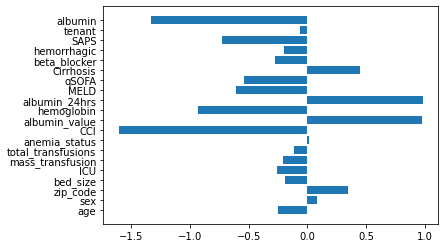

In [208]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

                    Importance
albumin_24hrs         2.675122
albumin_value         2.655049
Cirrhosis             1.559443
zip_code              1.417405
sex                   1.083017
anemia_status         1.011576
tenant                0.937537
total_transfusions    0.889781
bed_size              0.823238
hemorrhagic           0.819578
mass_transfusion      0.815420
age                   0.781020
ICU                   0.770062
beta_blocker          0.758512
qSOFA                 0.580861
MELD                  0.544325
SAPS                  0.485599
hemoglobin            0.392743
albumin               0.263426
CCI                   0.200792


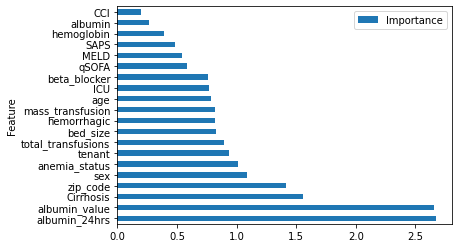

In [209]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [210]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [211]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[16354  1213   850]
 [ 7859  1498  1414]
 [ 3297  1069  3749]]


In [212]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.59      0.89      0.71     18417
           1       0.40      0.14      0.21     10771
           2       0.62      0.46      0.53      8115

    accuracy                           0.58     37303
   macro avg       0.54      0.50      0.48     37303
weighted avg       0.54      0.58      0.53     37303



In [213]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4143  294  227]
 [1923  378  339]
 [ 839  263  920]]


In [214]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.60      0.89      0.72      4664
           1       0.40      0.14      0.21      2640
           2       0.62      0.45      0.52      2022

    accuracy                           0.58      9326
   macro avg       0.54      0.50      0.48      9326
weighted avg       0.55      0.58      0.53      9326



## Decision Tree

In [215]:
# instantiate a decision tree model
dt = tree.DecisionTreeClassifier()
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Feature: age Score: 0.12419
Feature: sex Score: 0.02317
Feature: zip_code Score: 0.04359
Feature: bed_size Score: 0.02236
Feature: ICU Score: 0.01372
Feature: mass_transfusion Score: 0.00460
Feature: total_transfusions Score: 0.03674
Feature: anemia_status Score: 0.01245
Feature: CCI Score: 0.06255
Feature: albumin_value Score: 0.10649
Feature: hemoglobin Score: 0.14290
Feature: albumin_24hrs Score: 0.00590
Feature: MELD Score: 0.09270
Feature: qSOFA Score: 0.01715
Feature: Cirrhosis Score: 0.01255
Feature: beta_blocker Score: 0.01842
Feature: hemorrhagic Score: 0.00695
Feature: SAPS Score: 0.12162
Feature: tenant Score: 0.06318
Feature: albumin Score: 0.06877


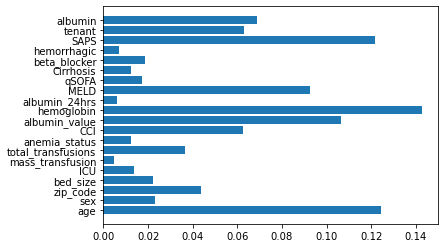

In [217]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [218]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [219]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[18417     0     0]
 [    0 10771     0]
 [    0     0  8115]]


In [220]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18417
           1       1.00      1.00      1.00     10771
           2       1.00      1.00      1.00      8115

    accuracy                           1.00     37303
   macro avg       1.00      1.00      1.00     37303
weighted avg       1.00      1.00      1.00     37303



In [221]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[2670 1400  594]
 [1194  854  592]
 [ 609  604  809]]


In [222]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.60      0.57      0.58      4664
           1       0.30      0.32      0.31      2640
           2       0.41      0.40      0.40      2022

    accuracy                           0.46      9326
   macro avg       0.43      0.43      0.43      9326
weighted avg       0.47      0.46      0.47      9326

